<a href="https://colab.research.google.com/github/preetamjumech/Boosting/blob/main/Gradient_Boosting_17_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
boston = load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.Series(boston.target)

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=3,max_depth=2,learning_rate=1.0)

In [ ]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [ ]:
y_pred=gbr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.7121440326032364

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
feature_importance=gbr.feature_importances_

In [ ]:
feature_importance = 100*( feature_importance/feature_importance.max())
sorted_indx = np.argsort(feature_importance)
sorted_indx


array([ 1,  2,  3,  4,  6,  9, 10, 11,  7,  0,  8, 12,  5])

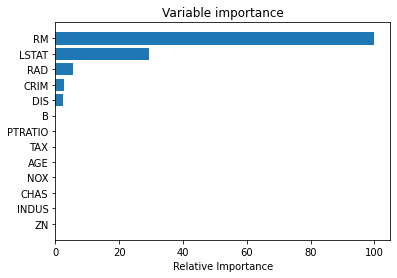

In [ ]:
pos = np.arange(sorted_indx.shape[0])+0.5
plt.barh(pos,feature_importance[sorted_indx],align="center")
plt.yticks(pos,boston.feature_names[sorted_indx])
plt.xlabel("Relative Importance")
plt.title("Variable importance")
plt.show()

In [ ]:
feature_importance[sorted_indx]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         2.34781554,   2.7037277 ,   5.36746481,  29.3026745 ,
       100.        ])

In [ ]:
from sklearn.model_selection import GridSearchCV
lr = {"learning_rate":[0.15,0.1,0.01,0.2],"n_estimators":[100,150,200,250]}
tuning = GridSearchCV(estimator=GradientBoostingRegressor(),
                      param_grid=lr,
                      scoring="r2")
tuning.fit(X_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 250}, 0.8886552834415635)